<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.1 - Exploratory Data Analysis continued 📊
</div>

This is a notebook for pre-processing more on your dataset. You can use it with same functionality as notebook `2.0-preprocessing.ipynb` during your exploratory data analysis process.

## Import

In [2]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# Change the theme of the plots:
plt.style.use('fivethirtyeight')

In [3]:
video_df = pd.read_csv('../data/processed/df_videos_processed.csv', lineterminator='\n')
video_df.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,playlist_title,channelTitle,playlist_published,playlist_numvideo
0,H_8ZVRRtiIA,"#1 AI for Good Specialization [Course 1, Week ...",2023-11-17 21:49:15+00:00,1671,34.0,1.0,0 days 00:10:01,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
1,bZwkaVnhEo4,"#2 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:54:21+00:00,1299,18.0,1.0,0 days 00:07:12,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
2,hkOosfWxBK4,"#3 AI for Good Specialization [Course 1, Week ...",2023-11-17 20:13:19+00:00,584,20.0,2.0,0 days 00:03:47,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
3,OIavgUGg7mc,"#4 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:54:56+00:00,619,10.0,0.0,0 days 00:04:49,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
4,eZZwySXsj-g,"#5 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:55:12+00:00,579,3.0,0.0,0 days 00:05:36,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0


In [4]:
comment_df = pd.read_csv('../data/processed/df_comments_processed.csv', lineterminator='\n')
comment_df.head()

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,@AiexpertRajivVerma,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11 01:11:19+00:00,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for f...,2023-12-11 01:11:19+00:00
1,@hamasali8764,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27 16:54:52+00:00,Best One🎉,2023-07-27 16:54:52+00:00
2,@R0H00,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18 02:51:01+00:00,"Hi, I&#39;m a clinician who is working in the ...",2023-11-18 02:51:01+00:00
3,@nitinsnoisepollution6293,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17 20:39:13+00:00,Superb 🎉❤,2023-11-17 20:39:13+00:00
4,@REDBONDYT,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30 12:36:13+00:00,Very informative 😃😺,2023-07-30 12:36:13+00:00


## What is the most common topic for all the channels by time?

In [6]:
# Find the day range of the videos
video_df['published'] = pd.to_datetime(video_df['published'])
video_df['published'].describe()

/tmp/ipykernel_4935/3036489752.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  video_df['published'].describe()


count                          7608
unique                         5773
top       2019-05-08 04:51:05+00:00
freq                             27
first     2014-08-06 22:09:12+00:00
last      2023-12-22 15:26:16+00:00
Name: published, dtype: object

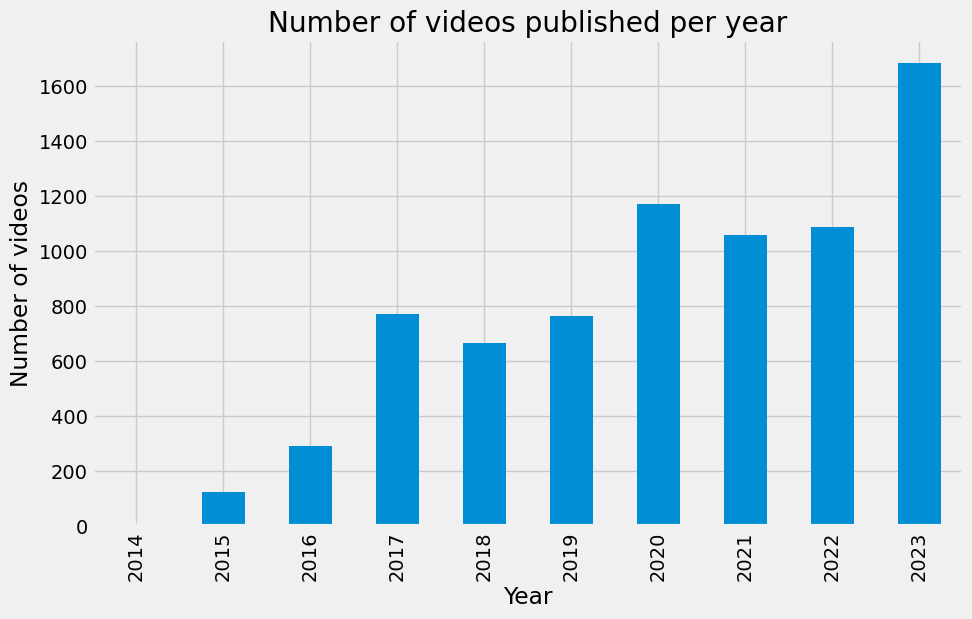

In [25]:
# Plot the number of videos published per year
video_df['published'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of videos published per year')
plt.xlabel('Year')
plt.ylabel('Number of videos')
plt.show()
